<a href="https://colab.research.google.com/github/diego-andrade279/CSV/blob/main/PROJETO_CIENCIA_DE_DADOS_GRAU_ESCOLARIDADE_DOS_ELEITORES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CVS_PROJETO/perfil_comparecimento_abstencao_2018.csv',encoding="ISO-8859-1",delimiter=';')
df

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
0,29/01/2019,17:33:34,2018,2,MA,7820,LAGOA DO MATO,44,4,FEMININO,...,20 anos,5,ENSINO MÉDIO INCOMPLETO,5,5,0,0,0,0,0
1,29/01/2019,17:33:34,2018,2,MA,7820,LAGOA DO MATO,44,4,FEMININO,...,30 a 34 anos,1,ANALFABETO,1,1,0,0,0,0,0
2,29/01/2019,17:33:34,2018,2,MA,7820,LAGOA DO MATO,44,4,FEMININO,...,30 a 34 anos,2,LÊ E ESCREVE,5,4,1,0,0,0,0
3,29/01/2019,17:33:34,2018,2,MA,7820,LAGOA DO MATO,44,4,FEMININO,...,35 a 39 anos,2,LÊ E ESCREVE,22,20,2,0,0,0,0
4,29/01/2019,17:33:34,2018,2,MA,7820,LAGOA DO MATO,44,4,FEMININO,...,35 a 39 anos,4,ENSINO FUNDAMENTAL COMPLETO,6,6,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8362581,29/01/2019,17:33:34,2018,1,CE,98531,QUIXELÔ,13,4,FEMININO,...,50 a 54 anos,5,ENSINO MÉDIO INCOMPLETO,8,8,0,0,0,0,0
8362582,29/01/2019,17:33:34,2018,1,CE,98531,QUIXELÔ,13,4,FEMININO,...,50 a 54 anos,7,SUPERIOR INCOMPLETO,3,3,0,0,0,0,0
8362583,29/01/2019,17:33:34,2018,1,CE,98531,QUIXELÔ,13,4,FEMININO,...,55 a 59 anos,2,LÊ E ESCREVE,49,46,3,1,0,0,0
8362584,29/01/2019,17:33:34,2018,1,CE,98531,QUIXELÔ,13,4,FEMININO,...,60 a 64 anos,5,ENSINO MÉDIO INCOMPLETO,1,1,0,0,0,0,0


#DF.INFO() Informaçoes sobre o data frame


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8362586 entries, 0 to 8362585
Data columns (total 23 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   DT_GERACAO                     object
 1   HH_GERACAO                     object
 2   ANO_ELEICAO                    int64 
 3   NR_TURNO                       int64 
 4   SG_UF                          object
 5   CD_MUNICIPIO                   int64 
 6   NM_MUNICIPIO                   object
 7   NR_ZONA                        int64 
 8   CD_GENERO                      int64 
 9   DS_GENERO                      object
 10  CD_ESTADO_CIVIL                int64 
 11  DS_ESTADO_CIVIL                object
 12  CD_FAIXA_ETARIA                int64 
 13  DS_FAIXA_ETARIA                object
 14  CD_GRAU_ESCOLARIDADE           int64 
 15  DS_GRAU_ESCOLARIDADE           object
 16  QT_APTOS                       int64 
 17  QT_COMPARECIMENTO              int64 
 18  QT_ABSTENCAO          

**MANIPULAÇAO DOS DADOS E LIMPEZA COM "PANDAS"**

# QUANTIDADE DE ELEITORES ANALFABETOS QUE PARTICIPARAM DAS ELEIÇÕES DE 2018.

In [ ]:
#ANALFABETO POR ESTADO & ABSTENCAO
AN_ESTADO = df.loc[(df.CD_GRAU_ESCOLARIDADE == 1) & (df.NR_TURNO == 1)  ,['SG_UF','DS_GENERO','DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO','QT_ABSTENCAO']]
AN_ESTADO = AN_ESTADO[['SG_UF','QT_COMPARECIMENTO','QT_ABSTENCAO']]
TOTAL_AN_ESTADO = AN_ESTADO.groupby(['SG_UF']).sum()
TOTAL_AN_ESTADO.sort_values('QT_COMPARECIMENTO', ascending=False).reset_index()

,SG_UF,QT_COMPARECIMENTO,QT_ABSTENCAO
0,BA,405438,380158
1,MG,305167,437183
2,CE,304815,207148
3,SP,295255,500179
4,PE,261601,220723
5,MA,250701,195857
6,PA,158016,187790
7,PI,149362,71734
8,AL,147154,107863
9,PB,139220,80235


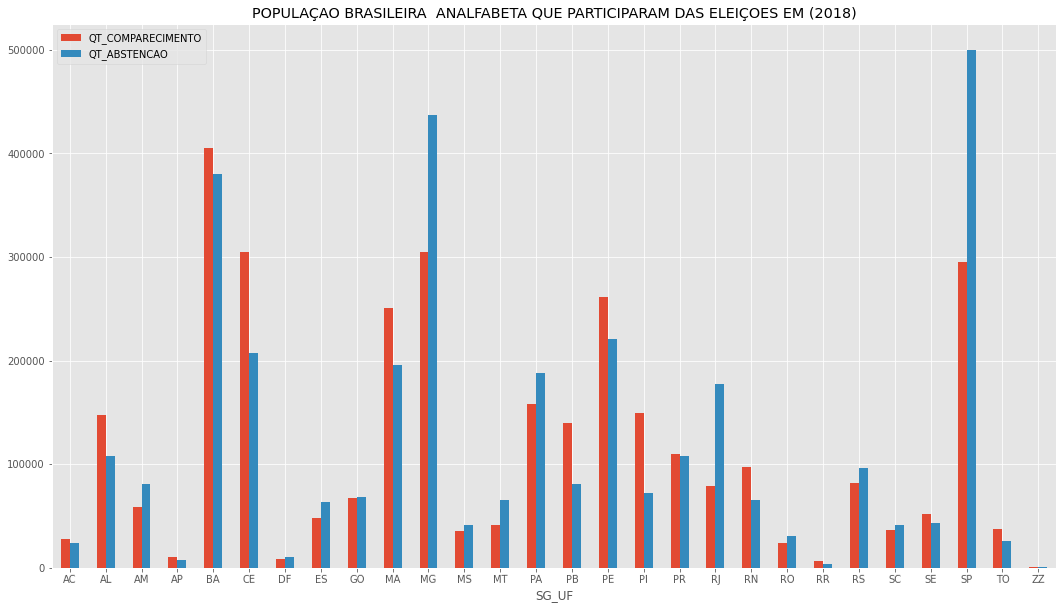

In [ ]:
#VISUALIZANDO MELHOR OS GRAFICOS
plt.style.use("ggplot")

TOTAL_AN_ESTADO.plot(kind='bar',figsize=(18,10) ,rot=1)

plt.title('POPULAÇAO BRASILEIRA  ANALFABETA QUE PARTICIPARAM DAS ELEIÇOES EM (2018)') 
plt.show()

Os DADOS apresentados acima mostram que o estado da Bahia possui o maior numero de eleitores ANALFABETOS que compareceram as Urnas, porém o estado Sao Paulo nas Abstenção teve o maior numero de eleitores que ANALFABETOS, com isso o estado de SP passa a ser o estado com maior numero de eleitores ANALFABETOS. Isso se deve ao fluxo migratório da população dos estados mais pobre para Sao paulo.

# FAIXA ETARIA  DE HOMENS ANALFABETOS QUE COMPARECERAM AS URNAS EM(2018)

In [ ]:
from pandas.core.common import require_length_match
TOTAL_AN_ESTADO_H =  df.loc[(df.CD_GRAU_ESCOLARIDADE == 1) & (df.NR_TURNO == 1) & (df.CD_GENERO == 2),['DS_GENERO','DS_FAIXA_ETARIA','QT_COMPARECIMENTO']]
TOTAL_AN_ESTADO_H = TOTAL_AN_ESTADO_H[['DS_GENERO','DS_FAIXA_ETARIA','QT_COMPARECIMENTO']]
TOTAL_AN_ESTADO_H = TOTAL_AN_ESTADO_H.groupby(['DS_GENERO','DS_FAIXA_ETARIA']).sum()
TOTAL_AN_ESTADO_H.sort_values('QT_COMPARECIMENTO',ascending=False)

QT_COMPARECIMENTO
DS_GENERO DS_FAIXA_ETARIA                    
MASCULINO 50 a 54 anos                 237599
          55 a 59 anos                 216991
          45 a 49 anos                 207622
          60 a 64 anos                 199982
          40 a 44 anos                 189201
          65 a 69 anos                 175118
          35 a 39 anos                 130783
          70 a 74 anos                  98549
          30 a 34 anos                  62479
          75 a 79 anos                  50964
          25 a 29 anos                  31781
          80 a 84 anos                  18823
          21 a 24 anos                  16054
          85 a 89 anos                   6013
          20 anos                        2922
          19 anos                        2527
          18 anos                        1906
          90 a 94 anos                   1424
          17 anos                         854
          95 a 99 anos                    467
          16 anos                         347
          100 anos ou mais                150
          Inválido                        143

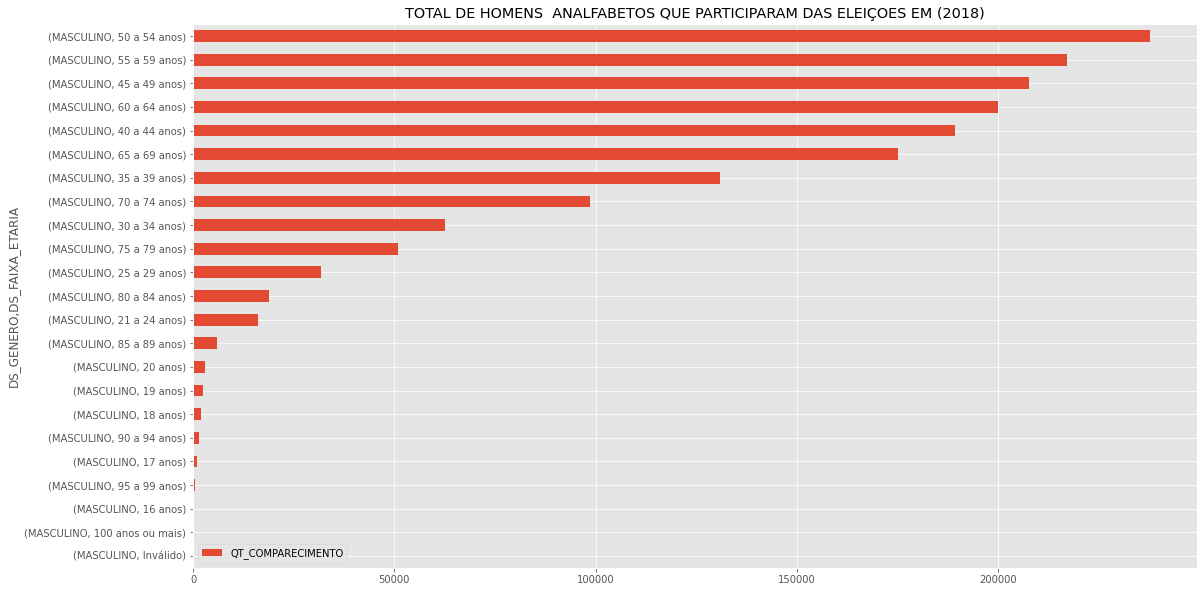

In [ ]:
plt.style.use("ggplot")


TOTAL_AN_ESTADO_H.sort_values('QT_COMPARECIMENTO',ascending=True).plot(kind='barh', figsize=(18,10) ,rot=0)


plt.title('TOTAL DE HOMENS  ANALFABETOS QUE PARTICIPARAM DAS ELEIÇOES EM (2018)') 
plt.show()

 O Gráfico acima mostra que os Homens Analfabetos que compareceram a eleição estao na faixa etaria de IDADE entre **40 & 60 ANOS**.

# FAIXA ETARIA DE MULHERES ANALFABETAS QUE COMPARECERAM AS URNAS EM(2018)

In [ ]:
TOTAL_AN_ESTADO_M =  df.loc[(df.CD_GRAU_ESCOLARIDADE == 1) & (df.NR_TURNO == 1) & (df.CD_GENERO == 4),['DS_GENERO','DS_FAIXA_ETARIA','QT_COMPARECIMENTO']]
TOTAL_AN_ESTADO_M = TOTAL_AN_ESTADO_M[['DS_GENERO','DS_FAIXA_ETARIA','QT_COMPARECIMENTO']]
TOTAL_AN_ESTADO_M = TOTAL_AN_ESTADO_M.groupby(['DS_GENERO','DS_FAIXA_ETARIA']).sum()
TOTAL_AN_ESTADO_M.sort_values('QT_COMPARECIMENTO',ascending=False).reset_index()

,DS_GENERO,DS_FAIXA_ETARIA,QT_COMPARECIMENTO
0,FEMININO,60 a 64 anos,243205
1,FEMININO,55 a 59 anos,240417
2,FEMININO,50 a 54 anos,229520
3,FEMININO,65 a 69 anos,219241
4,FEMININO,45 a 49 anos,171262
5,FEMININO,40 a 44 anos,134576
6,FEMININO,70 a 74 anos,107559
7,FEMININO,35 a 39 anos,90656
8,FEMININO,75 a 79 anos,48171
9,FEMININO,30 a 34 anos,41784


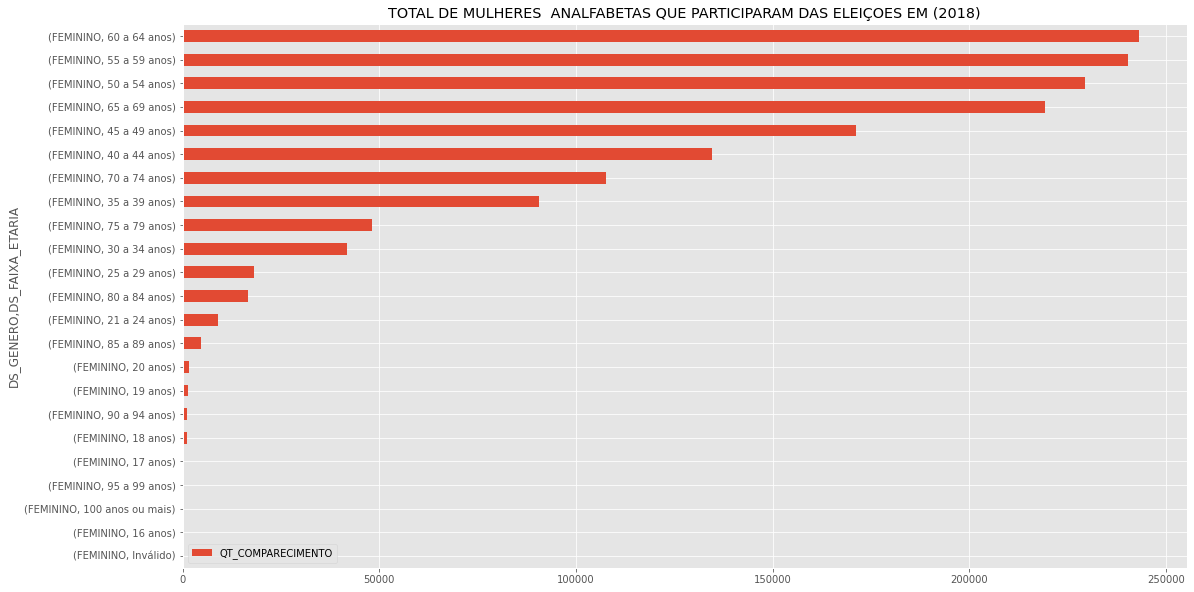

In [ ]:
plt.style.use("ggplot")


TOTAL_AN_ESTADO_M.sort_values('QT_COMPARECIMENTO',ascending=True).plot(kind='barh', figsize=(18,10) ,rot=0)


plt.title('TOTAL DE MULHERES  ANALFABETAS QUE PARTICIPARAM DAS ELEIÇOES EM (2018)') 
plt.show()

O Grafico acima mostra que a maior parte das MULHERES Analfabetas que comparecerao a eleiçao estao na faixa etaria de IDADE entre **45 & 64 ANOS**.

# Total de eleitores Analfabetos  comparecimento & abstençao

In [ ]:
#ABSTENÇAO é o ato de se negar ou se eximir de fazer opções políticas.
AN =  df.loc[(df.CD_GRAU_ESCOLARIDADE == 1) & (df.NR_TURNO == 1),['DS_GENERO','QT_COMPARECIMENTO','QT_ABSTENCAO']]
AN = AN[['DS_GENERO','QT_COMPARECIMENTO','QT_ABSTENCAO']]
AN = AN.groupby(['DS_GENERO']).sum()
AN.sort_values('QT_COMPARECIMENTO',ascending=False).reset_index()

,DS_GENERO,QT_COMPARECIMENTO,QT_ABSTENCAO
0,MASCULINO,1652699,1475292
1,FEMININO,1581028,1860708
2,NÃO INFORMADO,838,3623


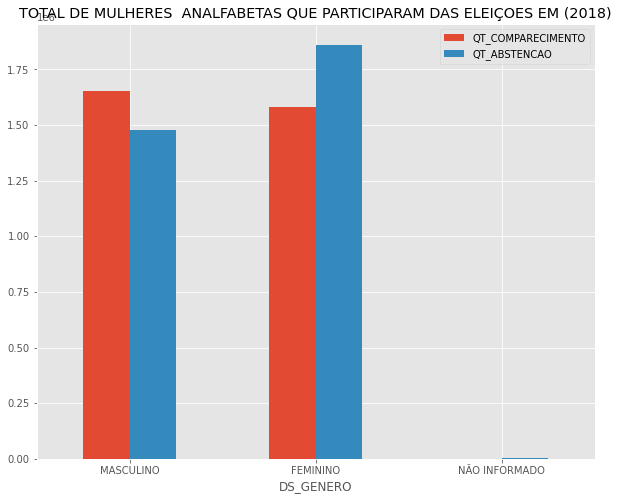

In [ ]:
#Em Política, ABSTENÇAO é o ato de se negar ou se eximir de fazer opções políticas. Abster-se do processo político é visto como uma forma de participação passiva.
plt.style.use("ggplot")
AN.sort_values('QT_COMPARECIMENTO',ascending=False).plot(kind='bar', figsize=(10,8) ,rot=0)


plt.title('TOTAL DE MULHERES  ANALFABETAS QUE PARTICIPARAM DAS ELEIÇOES EM (2018)') 
plt.show()

Este gráfico mostra que mostra que os homens compareceram mais que as mulheres e se abstiverao menos que as mulheres nas eleições, as abstenção por parte das mulheres podem ter sido geradas por qualquer  tipo de situação desde não querer votar ate problema de saúde.

In [ ]:
#PERCENTUAL DE ELEITORES ANALFABETOS
TOTAL = df.loc[(df.NR_TURNO == 1), ['QT_COMPARECIMENTO']]
PERCENT =  ( AN['QT_COMPARECIMENTO'].sum()/TOTAL['QT_COMPARECIMENTO'].sum())*100
print(f"PERCENTUAL: {PERCENT:1.2f}%")

PERCENTUAL: 2.76%


Os **DADOS** apresentados acima mostram que **2.76%** dos eleitores que compareceram nas eleições em 2018 sao ANALFABETOS.

# ENSINO FUNDAMENTAL COMPLETO E INCOMPLETO & LE E ESCREVE 

In [ ]:
FUN_I = df.loc[(df.CD_GRAU_ESCOLARIDADE >= 2) & (df.CD_GRAU_ESCOLARIDADE <= 4) & (df.NR_TURNO == 1) ,['SG_UF','DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO','QT_ABSTENCAO']]
FUN_I = FUN_I[['DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO','QT_ABSTENCAO']]
FUN_I = FUN_I.groupby(['DS_GRAU_ESCOLARIDADE']).sum()
FUN_I

,QT_COMPARECIMENTO,QT_ABSTENCAO
DS_GRAU_ESCOLARIDADE,,
ENSINO FUNDAMENTAL COMPLETO,7894332,2136090
ENSINO FUNDAMENTAL INCOMPLETO,29460618,8603999
LÊ E ESCREVE,9333421,3813910


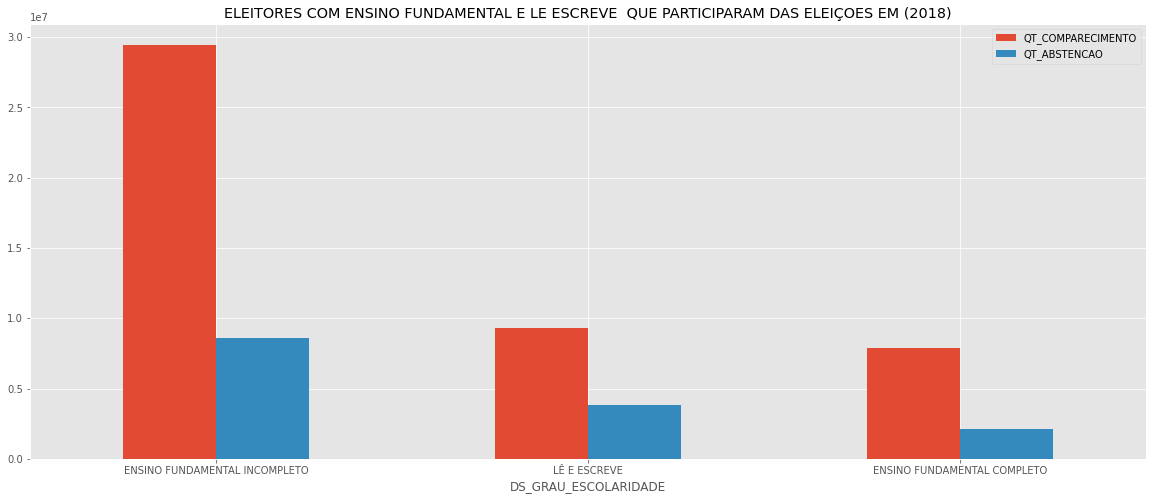

In [ ]:
#Em Política, ABSTENÇAO é o ato de se negar ou se eximir de fazer opções políticas. Abster-se do processo político é visto como uma forma de participação passiva.
plt.style.use("ggplot")
FUN_I.sort_values('QT_COMPARECIMENTO',ascending=False).plot(kind='bar', figsize=(20,8) ,rot=0)


plt.title('ELEITORES COM ENSINO FUNDAMENTAL E LE ESCREVE  QUE PARTICIPARAM DAS ELEIÇOES EM (2018)') 
plt.show()

In [ ]:
#TL == TOTAL DE ELEITORES
TL = df.loc[(df.NR_TURNO == 1),['QT_COMPARECIMENTO']]
TL = TL['QT_COMPARECIMENTO'].sum()
########## EFC = ENSINO FUNDAMENTAL COMPLETO 
EFC = df.loc[(df.CD_GRAU_ESCOLARIDADE == 4 ) & (df.NR_TURNO == 1),['QT_COMPARECIMENTO']]
EFC = EFC['QT_COMPARECIMENTO'].sum()
########## EFI = ENSINO FUNDAMENTAL INCOMPLETO 
EFI = df.loc[(df.CD_GRAU_ESCOLARIDADE == 3 ) & (df.NR_TURNO == 1),['QT_COMPARECIMENTO']]
EFI = EFI['QT_COMPARECIMENTO'].sum()
########## LE = LE E ESCREVE
LE = df.loc[(df.CD_GRAU_ESCOLARIDADE == 2 ) & (df.NR_TURNO == 1),['QT_COMPARECIMENTO']]
LE = LE['QT_COMPARECIMENTO'].sum()

In [ ]:
PERCENT1 = (EFC / TL)*100
print(f"PERCENTUAL DE ELEITORES COM ENSINO FUNDAMENTAL COMPLETO: {PERCENT1:1.2f} %")
#
PERCENT2 = (EFI / TL)*100
print(f"PERCENTUAL DE ELEITORES COM ENSINO FUNDAMENTAL INCOMPLETO: {PERCENT2:1.2f} %")
#
PERCENT3 = (LE / TL)*100
print(f"PERCENTUAL DE ELEITORES QUE LE E ESCRECE: {PERCENT3:1.2f} %")

PERCENTUAL DE ELEITORES COM ENSINO FUNDAMENTAL COMPLETO: 6.73 %
PERCENTUAL DE ELEITORES COM ENSINO FUNDAMENTAL INCOMPLETO: 25.10 %
PERCENTUAL DE ELEITORES QUE LE E ESCRECE: 7.95 %


# ELEITORES COM ENSINO MEDIO COMPLETO QUE COMPARECERAO DA ELEIÇOES EM 2018.


In [ ]:
#TOTAL DE ELEITORES COM ENSINO MEDIO COMPLETO OU INCOMPLETO POR ESTADO:
#ABSTENÇAO é o ato de se negar ou se eximir de fazer opções políticas.
EN_MEDIO =  df.loc[(df.CD_GRAU_ESCOLARIDADE == 6) & (df.NR_TURNO == 1) ,['SG_UF','DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO','QT_ABSTENCAO']]

EN_MEDIO =  EN_MEDIO[['SG_UF','DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO','QT_ABSTENCAO']]
EN_MEDIO =  EN_MEDIO.groupby(['SG_UF','DS_GRAU_ESCOLARIDADE']).sum()
EN_MEDIO.sort_values('QT_COMPARECIMENTO', ascending=False)

,,QT_COMPARECIMENTO,QT_ABSTENCAO
SG_UF,DS_GRAU_ESCOLARIDADE,,
SP,ENSINO MÉDIO COMPLETO,7432706,1301508
MG,ENSINO MÉDIO COMPLETO,2426691,440080
RJ,ENSINO MÉDIO COMPLETO,2066975,431331
BA,ENSINO MÉDIO COMPLETO,1972485,298995
PR,ENSINO MÉDIO COMPLETO,1801373,250584
RS,ENSINO MÉDIO COMPLETO,1469550,210958
PE,ENSINO MÉDIO COMPLETO,1307463,158821
CE,ENSINO MÉDIO COMPLETO,1279859,156272
SC,ENSINO MÉDIO COMPLETO,1058146,137689


In [ ]:
from pandas.core.frame import DataFrame
ENSINO_PLOT =  df.loc[(df.CD_GRAU_ESCOLARIDADE == 6)  & (df.NR_TURNO == 1) ,['SG_UF','DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO','QT_ABSTENCAO']]
ENSINO_PLOT = pd.DataFrame(ENSINO_PLOT[['SG_UF','DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO','QT_ABSTENCAO']])
ENSINO_PLOT = ENSINO_PLOT.groupby(['SG_UF']).sum()


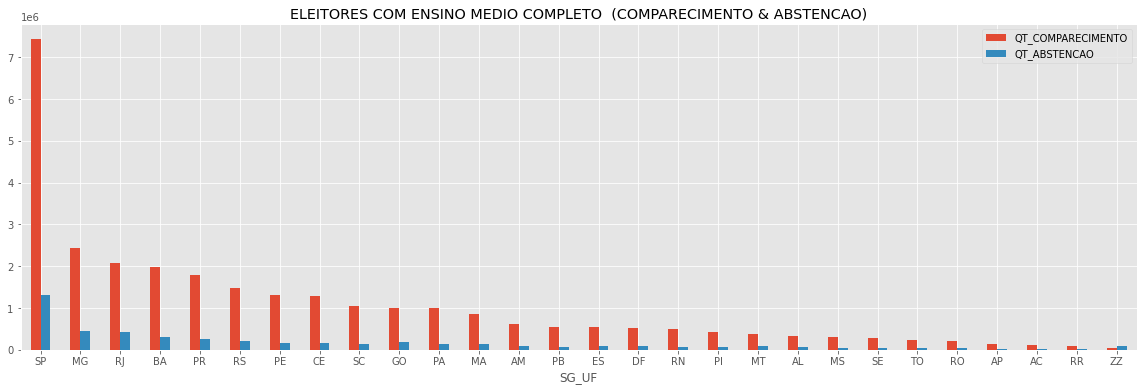

In [ ]:
plt.style.use("ggplot")


ENSINO_PLOT.sort_values('QT_COMPARECIMENTO',ascending=False).plot(kind='bar',figsize=(20,6) ,rot=0)

plt.title('ELEITORES COM ENSINO MEDIO COMPLETO  (COMPARECIMENTO & ABSTENCAO)') 
plt.show()

Nota-se que os ***DADOS*** acima, mostram que Sao Paulo tem o maior numero de eleitores com Ensino medio completo e as **abstenção** foi maior duque os eleitores analfabetos somados.

# ELEITORES COM ENSINO MEDIO INCOMPLETO **(COMPARECIMENTO & ABSTENÇAO)** NA ELEIÇAO EM 2018.

In [ ]:
ENSINO_PLOT =  df.loc[(df.CD_GRAU_ESCOLARIDADE == 5)  & (df.NR_TURNO == 1) ,['SG_UF','DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO','QT_ABSTENCAO']]
ENSINO_PLOT = pd.DataFrame(ENSINO_PLOT[['SG_UF','DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO','QT_ABSTENCAO']])
ENSINO_PLOT = ENSINO_PLOT.groupby(['SG_UF']).sum()
ENSINO_PLOT.sort_values('QT_COMPARECIMENTO',ascending=False)

,QT_COMPARECIMENTO,QT_ABSTENCAO
SG_UF,,
SP,4991433,1221934
MG,2586541,625709
RJ,2282556,469725
BA,1206939,296823
RS,1154683,230758
CE,868631,150139
PR,850060,184828
PE,805177,134123
PA,699394,141005


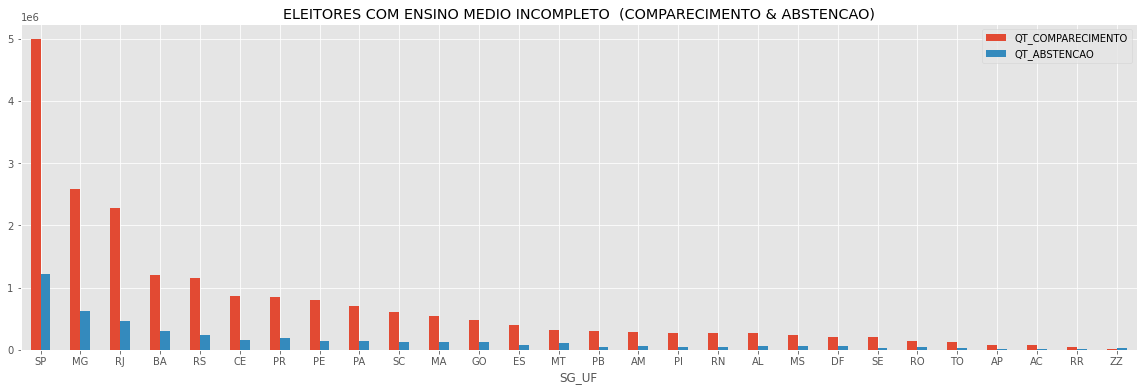

In [ ]:
plt.style.use("ggplot")


ENSINO_PLOT.sort_values('QT_COMPARECIMENTO',ascending=False).plot(kind='bar',figsize=(20,6) ,rot=0)

plt.title('ELEITORES COM ENSINO MEDIO INCOMPLETO  (COMPARECIMENTO & ABSTENCAO)') 
plt.show()

Nota-se que os eleitores com ensino medio incompleto *(compareceram & abstiveram-se)* nas eleições, quase na mesma proporção que os eleitores que possuem ensino medio completo, em comparação os eleitores analfabetos tiveram taxas menores de abstenção duque os eleitores com ensino medio, isso mostra que a  educação Basica na sociedade precisa ser atualizada para que assim venham formar pessoas consciente de seus direitos e deveres como cidadãos.

In [ ]:
# TOTAL DEELEITORES COM ENSINO MEDIO COMPLETO, INCOMPLETO & ANAL 
MEDIO_COMP =  df.loc[(df.CD_GRAU_ESCOLARIDADE >=1)  &(df.CD_GRAU_ESCOLARIDADE <=6) & (df.NR_TURNO == 1) ,['DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO','QT_ABSTENCAO']]
MEDIO_COMP = MEDIO_COMP.groupby(['DS_GRAU_ESCOLARIDADE']).sum()
MEDIO_COMP

,QT_COMPARECIMENTO,QT_ABSTENCAO
DS_GRAU_ESCOLARIDADE,,
ANALFABETO,3234565,3339623
ENSINO FUNDAMENTAL COMPLETO,7894332,2136090
ENSINO FUNDAMENTAL INCOMPLETO,29460618,8603999
ENSINO MÉDIO COMPLETO,28914793,4763404
ENSINO MÉDIO INCOMPLETO,20288874,4575776
LÊ E ESCREVE,9333421,3813910


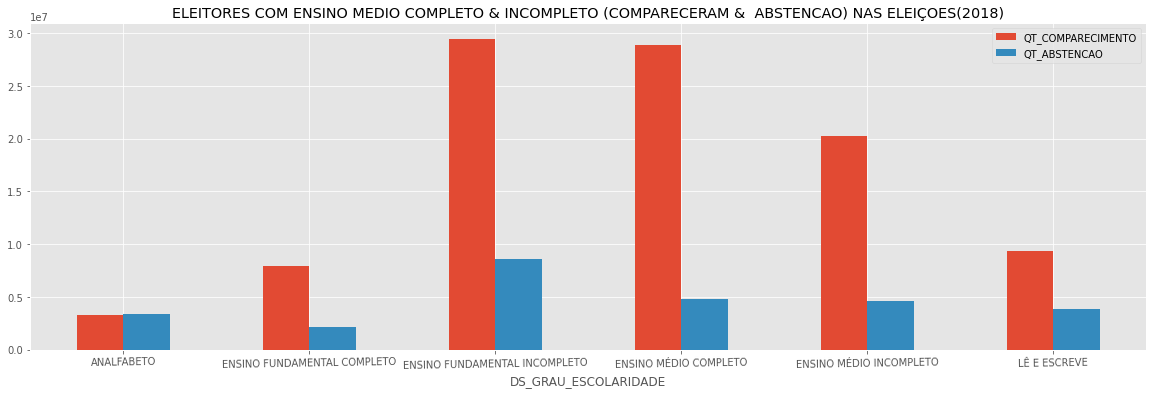

In [ ]:
plt.style.use("ggplot")

MEDIO_COMP.plot(kind='bar',figsize=(20,6) ,rot=1)

plt.title('ELEITORES COM ENSINO MEDIO COMPLETO & INCOMPLETO (COMPARECERAM &  ABSTENCAO) NAS ELEIÇOES(2018)') 
plt.show()

# Nova seção

In [ ]:
#total de eleitores que compareceram em 2018 1ºTURNO 
ELEITORES_TOTAL = df.loc[(df.QT_COMPARECIMENTO > 0)  & (df.NR_TURNO == 1),['ANO_ELEICAO','QT_COMPARECIMENTO']]
#soma todos os valores Na coluna 'QT_COMPARECIMENTO'
ELEITORES = ELEITORES_TOTAL['QT_COMPARECIMENTO'].sum()

########## ELEITORES COM ENSINO MEDIO COMPLETO
MEDIO_C = df.loc[(df.CD_GRAU_ESCOLARIDADE == 6) & (df.NR_TURNO == 1) ,['QT_COMPARECIMENTO']]
MEDIO_C = MEDIO_C['QT_COMPARECIMENTO'].sum()

##############
########## ELEITORES COM ENSINO MEDIO INCOMPLETO
MEDIO_I = df.loc[(df.CD_GRAU_ESCOLARIDADE == 5) & (df.NR_TURNO == 1) ,['QT_COMPARECIMENTO']]
MEDIO_I = MEDIO_I['QT_COMPARECIMENTO'].sum()

In [ ]:
from pandas.core.resample import f
#PERCENTUAL DE ELEITORES COM ENSINO MEDIO COMPLETO
PERCENT_C =  ( MEDIO_C / ELEITORES)*100

print(f"PERCENTUAL DE ELEITORES COM ENSINO MEDIO COMPLETO: {PERCENT_C:1.2f}%")

#############################
#PERCENTUAL DE ELEITORES COM ENSINO MEDIO INCOMPLETO
PERCENT_I =  ( MEDIO_I / ELEITORES)*100

print(f"PERCENTUAL DE ELEITORES COM ENSINO MEDIO INCOMPLETO: {PERCENT_I:1.2f}%")


PERCENTUAL DE ELEITORES COM ENSINO MEDIO COMPLETO: 24.64%
PERCENTUAL DE ELEITORES COM ENSINO MEDIO INCOMPLETO: 17.29%


#ELEITORES COM ENSINO SUPERIOR COMPLETO & INCONPLETO 

In [ ]:
EN_SUPER =  df.loc[ (df.CD_GRAU_ESCOLARIDADE == 8) & (df.NR_TURNO == 1),['SG_UF','DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO','QT_ABSTENCAO']]
EN_SUPER['DS_GRAU_ESCOLARIDADE'] = EN_SUPER['DS_GRAU_ESCOLARIDADE'].replace('SUPERIOR COMPLETO','C') 
EN_SUPER = EN_SUPER[['SG_UF','DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO','QT_ABSTENCAO']]
EN_SUPER = EN_SUPER.groupby(['SG_UF','DS_GRAU_ESCOLARIDADE']).sum()
EN_SUPER.sort_values('QT_COMPARECIMENTO', ascending=False).reset_index()
# C == ensino superior completo

,SG_UF,DS_GRAU_ESCOLARIDADE,QT_COMPARECIMENTO,QT_ABSTENCAO
0,SP,C,3175267,417666
1,PR,C,962066,110090
2,MG,C,931305,139480
3,RJ,C,783793,164817
4,RS,C,668205,82433
5,BA,C,597519,76532
6,SC,C,585517,57373
7,GO,C,470703,62400
8,PE,C,443948,53640
9,DF,C,430073,56885


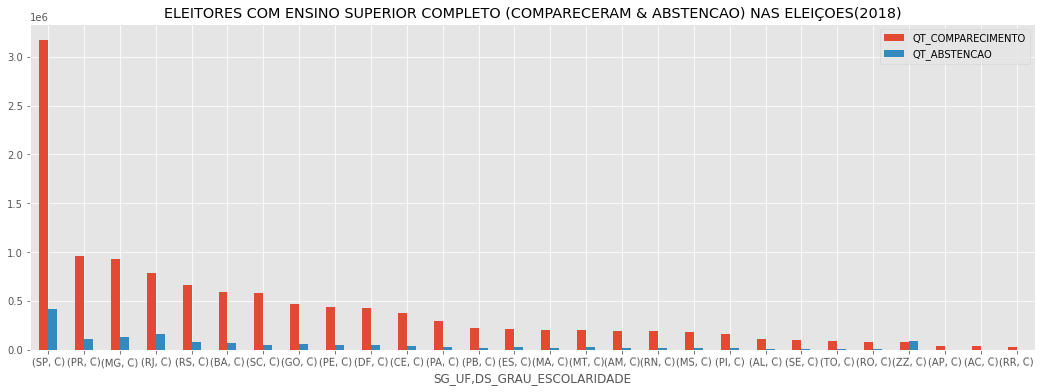

In [ ]:
plt.style.use("ggplot")

EN_SUPER.sort_values('QT_COMPARECIMENTO', ascending=False).plot(kind='bar',figsize=(18,6) ,rot=1)

plt.title('ELEITORES COM ENSINO SUPERIOR COMPLETO (COMPARECERAM & ABSTENCAO) NAS ELEIÇOES(2018)') 
plt.show()

O grafico mostra que os eleitores com ensino superior completo tiveram a segunda menor taxa de **abstencao** nas eleiçao, isso é um bom indicador de que quanto mais acesso a educaçao de ensino superior a populaçao tiver mais participaçao ela tera em futuras eleiçoes. 

# ELEITORES COM ENSINO SUPERIOR INCONPLETO

In [ ]:
EN_SUPER_I =  df.loc[ (df.CD_GRAU_ESCOLARIDADE == 7) & (df.NR_TURNO == 1),['SG_UF','DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO','QT_ABSTENCAO']]
EN_SUPER_I['DS_GRAU_ESCOLARIDADE'] = EN_SUPER_I['DS_GRAU_ESCOLARIDADE'].replace('SUPERIOR INCOMPLETO','I') 
EN_SUPER_I = EN_SUPER_I[['SG_UF','DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO','QT_ABSTENCAO']]
EN_SUPER_I = EN_SUPER_I.groupby(['SG_UF','DS_GRAU_ESCOLARIDADE']).sum()
EN_SUPER_I.sort_values('QT_COMPARECIMENTO', ascending=False).reset_index()
# I == ensino superior incompleto

,SG_UF,DS_GRAU_ESCOLARIDADE,QT_COMPARECIMENTO,QT_ABSTENCAO
0,SP,I,1466427,244146
1,RS,I,492141,72412
2,RJ,I,474068,93777
3,PR,I,462041,66863
4,MG,I,440694,83310
5,SC,I,303395,40343
6,BA,I,286849,45033
7,GO,I,258584,47374
8,PE,I,248758,31849
9,CE,I,242145,27721


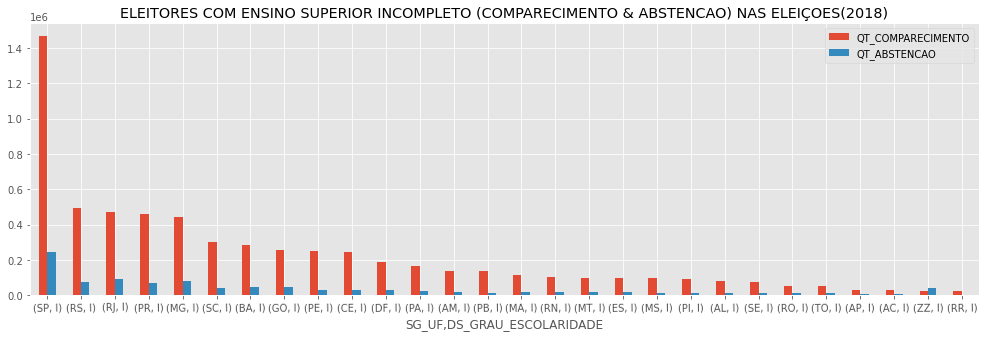

In [ ]:
plt.style.use("ggplot")

EN_SUPER_I.sort_values('QT_COMPARECIMENTO',ascending=False).plot(kind='bar',figsize=(17,5) ,rot=1)

plt.title('ELEITORES COM ENSINO SUPERIOR INCOMPLETO (COMPARECIMENTO & ABSTENCAO) NAS ELEIÇOES(2018)') 
plt.show()

O grafico mostra que os eleitores com ensino superior incompleto tiveram a menor taxa de Abstenção  na eleição , ja nos COMPARECIMENTO foi o penúltimo, isso indica um desinteresse desse publico na eleição que poderiam ser N motivos.

In [ ]:
#TOTAL DE ELEITORES COM ENSINO SUPERIOR COMPLETO OU INCOMPLETO
EN_SUPER2 = df.loc[(df.CD_GRAU_ESCOLARIDADE >= 7) & (df.CD_GRAU_ESCOLARIDADE <= 8) & (df.NR_TURNO == 1),['ANO_ELEICAO','DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO']]
EN_SUPER2 = EN_SUPER2.groupby(['ANO_ELEICAO','DS_GRAU_ESCOLARIDADE']).sum()
EN_SUPER2

QT_COMPARECIMENTO
ANO_ELEICAO DS_GRAU_ESCOLARIDADE                   
2018        SUPERIOR COMPLETO              11928788
            SUPERIOR INCOMPLETO             6278410

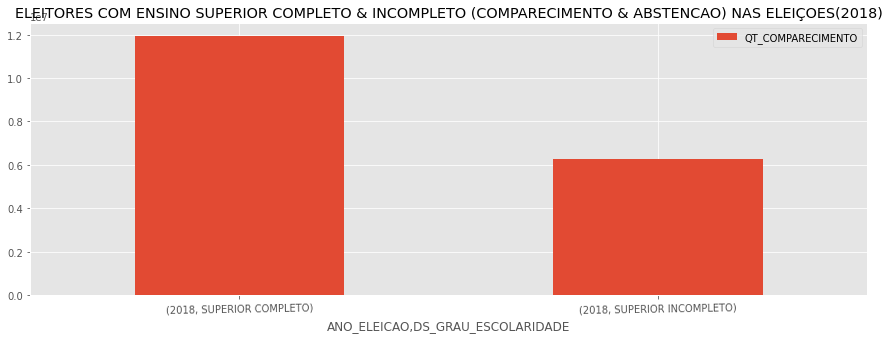

In [ ]:
plt.style.use("ggplot")

EN_SUPER2.plot(kind='bar',figsize=(15,5) ,rot=1)

plt.title('ELEITORES COM ENSINO SUPERIOR COMPLETO & INCOMPLETO (COMPARECIMENTO & ABSTENCAO) NAS ELEIÇOES(2018)') 
plt.show()

In [ ]:
#PERCENTUAL DE ELEITORES ENSINO SUPERIOR COMPLETO & INCOMPLETO
EN_SUPER3 = df.loc[(df.CD_GRAU_ESCOLARIDADE >= 7) & (df.CD_GRAU_ESCOLARIDADE <= 8) & (df.NR_TURNO == 1),['ANO_ELEICAO','DS_GRAU_ESCOLARIDADE','QT_COMPARECIMENTO','QT_ABSTENCAO']]
EN_SUPER3 = EN_SUPER3[['ANO_ELEICAO','QT_COMPARECIMENTO','QT_ABSTENCAO']]
EN_SUPER3 = EN_SUPER3.groupby(['ANO_ELEICAO']).sum()
EN_SUPER3

,QT_COMPARECIMENTO,QT_ABSTENCAO
ANO_ELEICAO,,
2018,18207198,2683313


In [ ]:
PERCENT_S = df.loc[(df.CD_GRAU_ESCOLARIDADE == 8) & (df.NR_TURNO == 1),['QT_COMPARECIMENTO']]
PERCENT_S = PERCENT_S['QT_COMPARECIMENTO'].sum()
#####
PERCENT_IN = df.loc[(df.CD_GRAU_ESCOLARIDADE == 7) & (df.NR_TURNO == 1),['QT_COMPARECIMENTO']]
PERCENT_IN = PERCENT_IN['QT_COMPARECIMENTO'].sum()

In [ ]:
PERCENT_T = (PERCENT_S / ELEITORES)*100
print(f"PERCENTUAL DE ELEITORES COM ENSINO SUPERIOR COMPLETO: {PERCENT_T:1.2f}%")
####
PERCENT_N = (PERCENT_IN / ELEITORES)*100
print(f"PERCENTUAL DE ELEITORES COM ENSINO SUPERIOR INCOMPLETO: {PERCENT_N:1.2f}%")

PERCENTUAL DE ELEITORES COM ENSINO SUPERIOR COMPLETO: 10.16%
PERCENTUAL DE ELEITORES COM ENSINO SUPERIOR INCOMPLETO: 5.35%


# Nova seção

# ***Quebrar os dados em conjunto de treino e conjunto de teste***

In [ ]:
from sklearn.model_selection import train_test_split
# 0 == norte
## 1 == nordeste
### 2 ==centro oeste
#### 3 == suldeste
##### 4 == sul
df['SG_UF'] = df['SG_UF'].replace('SP', 3)
df['SG_UF'] = df['SG_UF'].replace('MG', 3)
df['SG_UF'] = df['SG_UF'].replace('AC', 0)
df['SG_UF'] = df['SG_UF'].replace('PR', 4)
df['SG_UF'] = df['SG_UF'].replace('MS', 2)
df['SG_UF'] = df['SG_UF'].replace('RJ', 2)
df['SG_UF'] = df['SG_UF'].replace('RS', 4)                                      
df['SG_UF'] = df['SG_UF'].replace('SC', 4)                                  
df['SG_UF'] = df['SG_UF'].replace('BA', 1)
df['SG_UF'] = df['SG_UF'].replace('GO', 2)
df['SG_UF'] = df['SG_UF'].replace('PE', 1)
df['SG_UF'] = df['SG_UF'].replace('CE', 1)
df['SG_UF'] = df['SG_UF'].replace('DF', 2)
df['SG_UF'] = df['SG_UF'].replace('PA', 0)
df['SG_UF'] = df['SG_UF'].replace('PB', 1)
df['SG_UF'] = df['SG_UF'].replace('AM', 0)
df['SG_UF'] = df['SG_UF'].replace('MA', 1)
df['SG_UF'] = df['SG_UF'].replace('MT', 2)
df['SG_UF'] = df['SG_UF'].replace('RN', 1)
df['SG_UF'] = df['SG_UF'].replace('MS', 2)
df['SG_UF'] = df['SG_UF'].replace('PI', 1)
df['SG_UF'] = df['SG_UF'].replace('AL', 1)
df['SG_UF'] = df['SG_UF'].replace('SE', 1)
df['SG_UF'] = df['SG_UF'].replace('TO', 0)
df['SG_UF'] = df['SG_UF'].replace('RO', 0)
df['SG_UF'] = df['SG_UF'].replace('ZZ', 5)
df['SG_UF'] = df['SG_UF'].replace('AP', 0)
df['SG_UF'] = df['SG_UF'].replace('AC', 0)
df['SG_UF'] = df['SG_UF'].replace('RR', 0)
df['SG_UF'] = df['SG_UF'].replace('ES', 3)

df['DS_ESTADO_CIVIL'] =  df['DS_ESTADO_CIVIL'].replace('SOLTEIRO',0)
df['DS_ESTADO_CIVIL'] =  df['DS_ESTADO_CIVIL'].replace('CASADO',1)
df['DS_ESTADO_CIVIL'] =  df['DS_ESTADO_CIVIL'].replace('DIVORCIADO',2)
df['DS_ESTADO_CIVIL'] =  df['DS_ESTADO_CIVIL'].replace('SEPARADO JUDICIALMENTE',3)
df['DS_ESTADO_CIVIL'] =  df['DS_ESTADO_CIVIL'].replace('VIÚVO',4)   
df['DS_ESTADO_CIVIL'] =  df['DS_ESTADO_CIVIL'].replace('NÃO INFORMADO',5)       


x = df.drop(["DT_GERACAO","HH_GERACAO",'NR_TURNO',"ANO_ELEICAO","NM_MUNICIPIO","DS_GENERO","DS_FAIXA_ETARIA","DS_GRAU_ESCOLARIDADE","QT_COMPARECIMENTO_DEFICIENCIA","QT_ABSTENCAO_DEFICIENCIA","QT_COMPARECIMENTO_TTE","QT_ABSTENCAO_TTE"],axis=1)
y = df['NR_TURNO']



x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3 ,  random_state=123)
print(df.shape,x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(8362586, 23) (5853810, 11) (2508776, 11) (5853810,) (2508776,)


# REGRESSAO

In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

clf.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y1 = clf.predict(x_teste)


print(f"MAE de Teste: {mean_absolute_error(y_teste, y1):1.2f}")

MAE de Teste: 0.50


# Verifica o desempenho do estimador do scikit-learn no conjunto de teste

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = clf.predict(x_teste)

print(f"Acurácia de Teste: {mean_absolute_error(y_teste, y_pred):1.2f}")

Acurácia de Teste: 0.50


In [ ]:
CD = pd.DataFrame()
CD['x'] = df.loc[(df.NR_TURNO == 1),['QT_ABSTENCAO']].sum()
CD['y'] = df.loc[(df.NR_TURNO == 1),['QT_APTOS']].sum() # APTOS = PESSOAS APTAS A VOTAR
x_valor = CD[['x']]
y_valor = CD[['y']]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


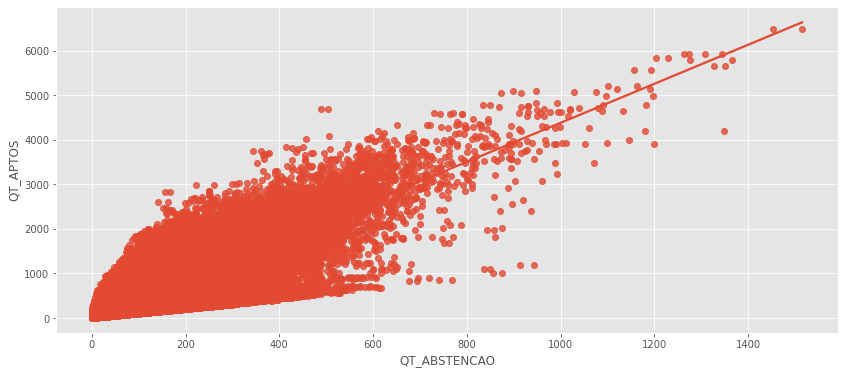

In [ ]:

plt.figure(figsize=(14,6))


sns.regplot(x='QT_ABSTENCAO', y='QT_APTOS', data=df)

fit = np.polyfit(CD['x'].values, CD['y'].values, 1)
reta = np.poly1d(fit)
# 
plt.plot(CD['x'].values, reta(CD['x'].values), 'r')
plt.show()